# Handwritten Digits Recognition

The goal of this code is to employ a fully-connected neural network for identifying handwritten digits. The model will be trained using the MNIST dataset, which comprises 70,000 grayscale images of 28 by 28 pixels depicting zip code digits along with their respective labels.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

## 1. Data Preprocessing
1. Load the MNIST data set included in the tf.keras.datasets.mnist module.

In [2]:
(X_train, Y_train), (X_test, Y_test) = load_data()

In [3]:
X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

60000 images of 28*28 pixes

3. Display some MNIST images with their corresponding labels.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
Y_train[0]

5

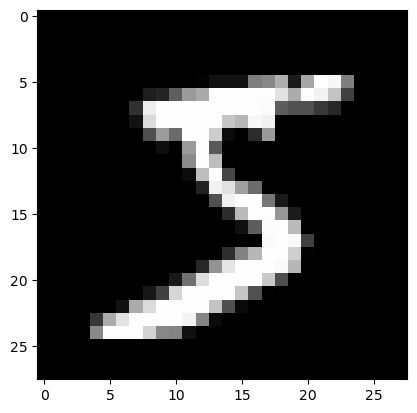

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')

This image corresponds to 5


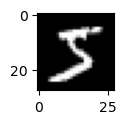

This image corresponds to 0


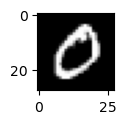

This image corresponds to 4


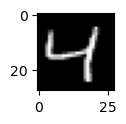

This image corresponds to 1


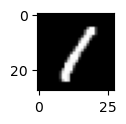

This image corresponds to 9


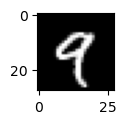

This image corresponds to 2


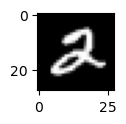

This image corresponds to 1


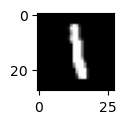

This image corresponds to 3


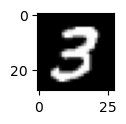

This image corresponds to 1


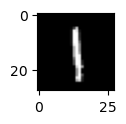

This image corresponds to 4


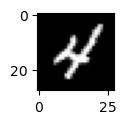

In [7]:
for i in range(10):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i], cmap='gray')
    print(f"This image corresponds to {Y_train[i]}")
    plt.show()


2. The MNIST images’ pixels are encoded on unsigned 8 bit blocks. Scale the training and the testing images.
- In order to scale the images the pixel values are between 0-255 so we will just devide them by 255(use the min-max scaler)
- we shouldn't scale the Y!

In [8]:
X_train_scaled = X_train / 255.  #(8*8)
X_test_scaled = X_test / 255.

In [9]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

4. Convert the training and the testing labels to one-hot encoding using tf.keras.to_categorical function.
- why we use one-hot encoding?
It allows the use of categorical variables in models that require numerical input.

In [10]:
from tensorflow.keras.utils import to_categorical
Y_train_hot = to_categorical(Y_train, num_classes = 10)
Y_test_hot = to_categorical(Y_test, num_classes = 10)

In [11]:
Y_train_hot[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
Y_test[1]

2

## 2 Model Architecture
1. Using tf.keras, create one-layer neural network to classify digits. The model should take as input numpy arrays of shape (28, 28) which should in their turn be flattened to 784 values. The model outputs the prediction probabilities through a softmax activation layer.

In [13]:
from tensorflow.keras.models import Sequential as sq
model = sq([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),  # here we do the initialization of the params
    tf.keras.layers.Activation('softmax')
])


2. Display the model’s architecture using the summary() method. How many trainable parameters are comprised in our model?


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##  3 Model Training and Evaluation
1. Train the model using the following hyper-parameters. Make sure to choose the appropriate loss function and
- Learning algorithm: SGD
- Learning rate: 0.01
- Mini-batch size: 32
- Number of training epochs: 30
- Validation set size: 25% of the training set

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             metrics=['accuracy'])

In [18]:
history = model.fit(x=X_train_scaled,
          y= Y_train_hot,
          batch_size=32,
          epochs= 30,
          validation_split=0.25,
          shuffle=True,
          use_multiprocessing=True)

Epoch 1/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3875 - accuracy: 0.8947 - val_loss: 0.3680 - val_accuracy: 0.8996
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3717 - accuracy: 0.8984 - val_loss: 0.3561 - val_accuracy: 0.9016
Epoch 3/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3600 - accuracy: 0.9007 - val_loss: 0.3477 - val_accuracy: 0.9039
Epoch 4/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3508 - accuracy: 0.9028 - val_loss: 0.3402 - val_accuracy: 0.9057
Epoch 5/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3435 - accuracy: 0.9042 - val_loss: 0.3345 - val_accuracy: 0.9073
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3374 - accuracy: 0.9057 - val_loss: 0.3296 - val_accuracy: 0.9087
Epoch 7/30
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3322 - accuracy: 0.9077 - val_loss: 0.3263 - val_accuracy

2. Plot the evolution of the loss function and the accuracy in function of the training epochs.

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

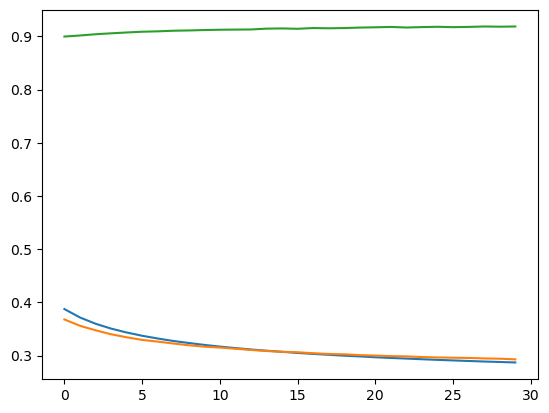

In [20]:
train_losses=history.history['loss']
val_losses = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(train_losses)
plt.plot(val_losses)
plt.plot(val_acc)
plt.show()

In [21]:
model.evaluate(X_test_scaled, Y_test_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.2841 - accuracy: 0.9206


[0.28408265113830566, 0.9205999970436096]

In [22]:
model.predict(X_train_scaled[0:1]) #we should give it as an argument a batch with only one image

1/1 [==============================] - 0s 157ms/step


array([[2.9431775e-03, 1.8976420e-05, 4.2008548e-03, 2.0956933e-01,
        4.4413955e-06, 7.7596807e-01, 5.7655451e-04, 4.0781596e-03,
        1.9415709e-03, 6.9887523e-04]], dtype=float32)

In [23]:
import numpy as np
np.argmax(model.predict(X_train_scaled[0:1]))

1/1 [==============================] - 0s 48ms/step


5

## 4. Improving the Model’s Performance

In [24]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),    # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             metrics=['accuracy'])


In [25]:
history1 = model.fit(x=X_train_scaled,
          y= Y_train_hot,
          batch_size=32,
          epochs= 30,
          validation_split=0.25,
          shuffle=True,
          use_multiprocessing=True)

Epoch 1/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7793 - accuracy: 0.7999 - val_loss: 0.4146 - val_accuracy: 0.8879
Epoch 2/30
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3807 - accuracy: 0.8950 - val_loss: 0.3370 - val_accuracy: 0.9069
Epoch 3/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3263 - accuracy: 0.9082 - val_loss: 0.3056 - val_accuracy: 0.9137
Epoch 4/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2963 - accuracy: 0.9161 - val_loss: 0.2853 - val_accuracy: 0.9202
Epoch 5/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2742 - accuracy: 0.9223 - val_loss: 0.2666 - val_accuracy: 0.9243
Epoch 6/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2557 - accuracy: 0.9279 - val_loss: 0.2518 - val_accuracy: 0.9295
Epoch 7/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2401 - accuracy: 0.9320 - val_loss: 0.2399 - val_acc

In [26]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

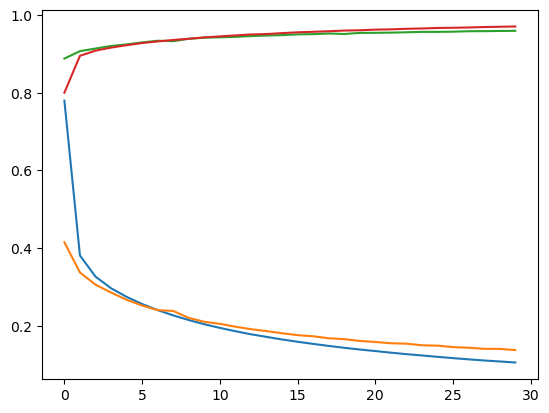

In [27]:
train_losses=history1.history['loss']
val_losses = history1.history['val_loss']
val_acc = history1.history['val_accuracy']
accuracy = history1.history['accuracy']

plt.figure()
plt.plot(train_losses)
plt.plot(val_losses)
plt.plot(val_acc)
plt.plot(accuracy)
plt.show()

Visualize misclassified images:

313/313 [==============================] - 1s 3ms/step


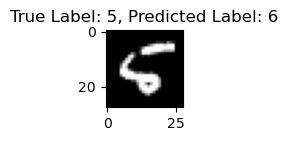

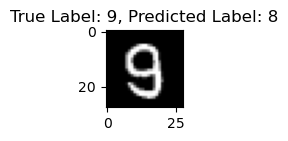

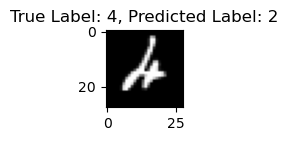

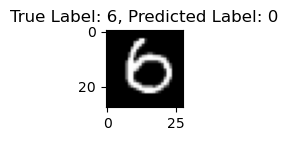

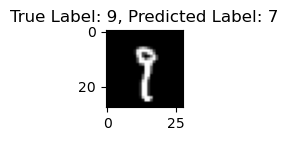

In [28]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test_scaled)

misclassified_indices = np.where(np.argmax(y_pred, axis=1) != np.argmax(Y_test_hot, axis=1))[0]

for i in misclassified_indices[:5]:
    plt.figure(figsize=(1, 1))
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True Label: {np.argmax(Y_test_hot[i])}, Predicted Label: {np.argmax(y_pred[i])}")
    plt.show()
